In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

In [2]:
train = pd.read_csv(filepath_or_buffer="train.csv")
train.columns = train.columns.str.replace(' ', '')
corr_features = train[['X', 'Y', 'target_2015', 'elevation']].copy()
train.describe()

X       Y  target_2015  elevation  precip2014-11-16-2014-11-23  \
count 16466.0 16466.0      16466.0    16466.0                      16466.0   
mean     35.1   -15.8          0.1      592.8                          1.6   
std       0.4     0.4          0.2      354.8                          4.2   
min      34.3   -16.6          0.0       45.5                          0.0   
25%      34.8   -16.1          0.0      329.1                          0.0   
50%      35.0   -15.8          0.0      623.0                          0.0   
75%      35.4   -15.5          0.0      751.4                          1.3   
max      35.9   -15.2          1.0     2803.3                         19.4   

       precip2014-11-23-2014-11-30  precip2014-11-30-2014-12-07  \
count                      16466.0                      16466.0   
mean                           2.5                          1.2   
std                            8.6                          4.4   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                           41.0                         22.0   

       precip2014-12-07-2014-12-14  precip2014-12-14-2014-12-21  \
count                      16466.0                      16466.0   
mean                           8.3                          8.9   
std                            4.3                          3.8   
min                            1.4                          3.6   
25%                            5.5                          5.9   
50%                            7.9                          8.6   
75%                           10.9                         11.0   
max                           18.9                         23.0   

       precip2014-12-21-2014-12-28  ...  precip2019-03-17-2019-03-24  \
count                      16466.0  ...                      16466.0   
mean                           9.6  ...                         35.6   
std                            4.5  ...                         14.5   
min                            1.3  ...                         15.8   
25%                            6.2  ...                         22.0   
50%                            8.8  ...                         34.3   
75%                           12.7  ...                         44.3   
max                           21.8  ...                         72.1   

       precip2019-03-24-2019-03-31  precip2019-03-31-2019-04-07  \
count                      16466.0                      16466.0   
mean                           2.1                          3.5   
std                            3.7                          8.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.9                          0.0   
75%                            2.1                          2.9   
max                           16.4                         37.1   

       precip2019-04-07-2019-04-14  precip2019-04-14-2019-04-21  \
count                      16466.0                      16466.0   
mean                           3.6                          9.1   
std                            3.8                          6.9   
min                            0.0                          0.0   
25%                            0.0                          4.4   
50%                            2.6                          7.9   
75%                            6.4                         13.5   
max                           13.0                         46.4   

       precip2019-04-21-2019-04-28  precip2019-04-28-2019-05-05  \
count                      16466.0                      16466.0   
mean                           1.7                          0.5   
std                            4.4         

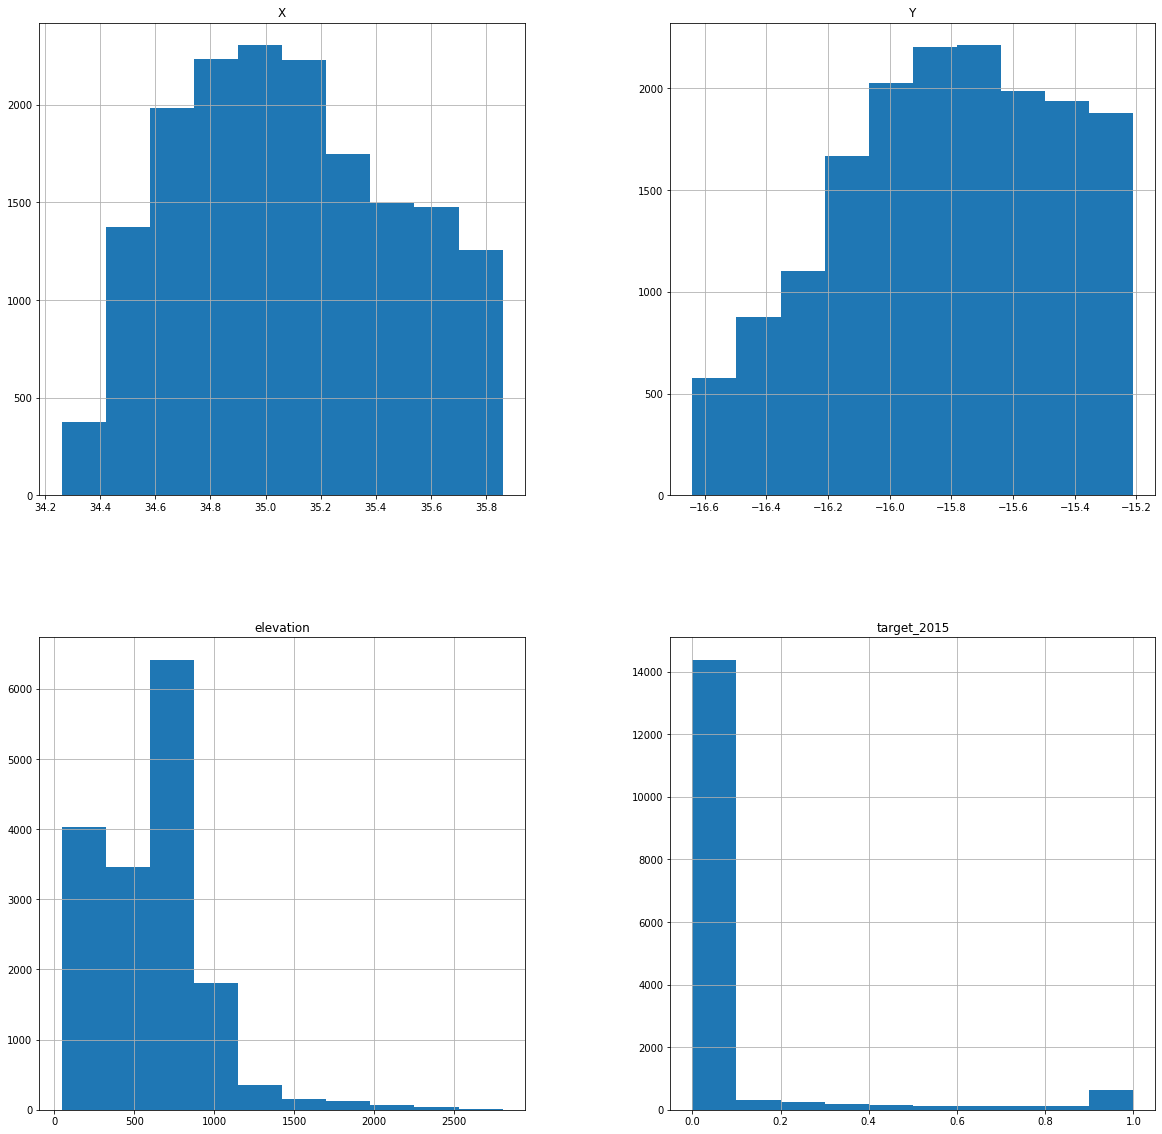

In [3]:
hist = corr_features.hist(figsize=(20, 20))

In [4]:
corr_features.corr()

X    Y  target_2015  elevation
X           1.0  0.2          0.1        0.4
Y           0.2  1.0         -0.1        0.5
target_2015 0.1 -0.1          1.0       -0.2
elevation   0.4  0.5         -0.2        1.0

In [5]:
train.head()

X     Y  target_2015  elevation  precip2014-11-16-2014-11-23  \
0 34.3 -15.9          0.0      887.8                          0.0   
1 34.3 -15.9          0.0      743.4                          0.0   
2 34.3 -15.9          0.0      565.7                          0.0   
3 34.3 -15.9          0.0      443.4                          0.0   
4 34.3 -15.9          0.0      437.4                          0.0   

   precip2014-11-23-2014-11-30  precip2014-11-30-2014-12-07  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   precip2014-12-07-2014-12-14  precip2014-12-14-2014-12-21  \
0                         14.8                         14.6   
1                         14.8                         14.6   
2                         14.8                         14.6   
3                         14.8                         14.6   
4                         14.8                         14.6   

   precip2014-12-21-2014-12-28  ...  precip2019-03-24-2019-03-31  \
0                         12.2  ...                          0.9   
1                         12.2  ...                          0.9   
2                         12.2  ...                          0.9   
3                         12.2  ...                          0.9   
4                         12.2  ...                          0.9   

   precip2019-03-31-2019-04-07  precip2019-04-07-2019-04-14  \
0                          1.7                          0.0   
1                          1.7                          0.0   
2                          1.7                          0.0   
3                          1.7                          0.0   
4                          1.7                          0.0   

   precip2019-04-14-2019-04-21  precip2019-04-21-2019-04-28  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   precip2019-04-28-2019-05-05  precip2019-05-05-2019-05-12  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   precip2019-05-12-2019-05-19  LC_Type1_mode  \
0                          0.0              9   
1                          0.0              9   
2                          0.0              9   
3                          0.0             10   
4                          0.0             10   

                              Square_ID  
0  4e3c3896-14ce-11ea-bce5-f49634744a41  
1  4e3c3897-14ce-11ea-bce5-f49634744a41  
2  4e3c3898-14ce-11ea-bce5-f49634744a41  
3  4e3c3899-14ce-11ea-bce5-f49634744a41  
4  4e3c389a-14ce-11ea-bce5-f49634744a41  

[5 rows x 40 columns]

In [6]:
## LC_Type1_mode

# 1	05450a	Evergreen Needleleaf Forests: dominated by evergreen conifer trees (canopy >2m). Tree cover >60%.
# 2	086a10	Evergreen Broadleaf Forests: dominated by evergreen broadleaf and palmate trees (canopy >2m). Tree cover >60%.
# 3	54a708	Deciduous Needleleaf Forests: dominated by deciduous needleleaf (larch) trees (canopy >2m). Tree cover >60%.
# 4	78d203	Deciduous Broadleaf Forests: dominated by deciduous broadleaf trees (canopy >2m). Tree cover >60%.
# 5	009900	Mixed Forests: dominated by neither deciduous nor evergreen (40-60% of each) tree type (canopy >2m). Tree cover >60%.
# 6	c6b044	Closed Shrublands: dominated by woody perennials (1-2m height) >60% cover.
# 7	dcd159	Open Shrublands: dominated by woody perennials (1-2m height) 10-60% cover.
# 8	dade48	Woody Savannas: tree cover 30-60% (canopy >2m).
# 9	fbff13	Savannas: tree cover 10-30% (canopy >2m).
# 10	b6ff05	Grasslands: dominated by herbaceous annuals (<2m).
# 11	27ff87	Permanent Wetlands: permanently inundated lands with 30-60% water cover and >10% vegetated cover.
# 12	c24f44	Croplands: at least 60% of area is cultivated cropland.
# 13	a5a5a5	Urban and Built-up Lands: at least 30% impervious surface area including building materials, asphalt and vehicles.
# 14	ff6d4c	Cropland/Natural Vegetation Mosaics: mosaics of small-scale cultivation 40-60% with natural tree, shrub, or herbaceous vegetation.
# 15	69fff8	Permanent Snow and Ice: at least 60% of area is covered by snow and ice for at least 10 months of the year.
# 16	f9ffa4	Barren: at least 60% of area is non-vegetated barren (sand, rock, soil) areas with less than 10% vegetation.
# 17	1c0dff	Water Bodies: at least 60% of area is covered by permanent water bodies.

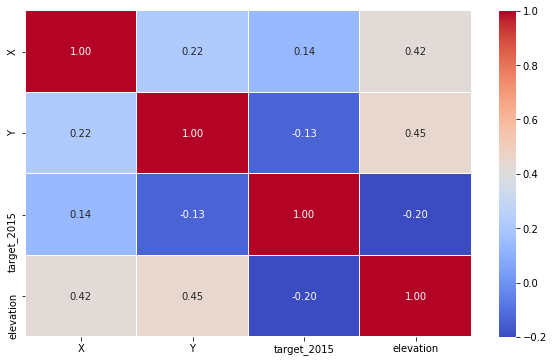

In [7]:
f, ax = plt.subplots(figsize=(10,6))
corr= corr_features.corr()
heatmap = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',fmt='.2f',linewidths=.05)

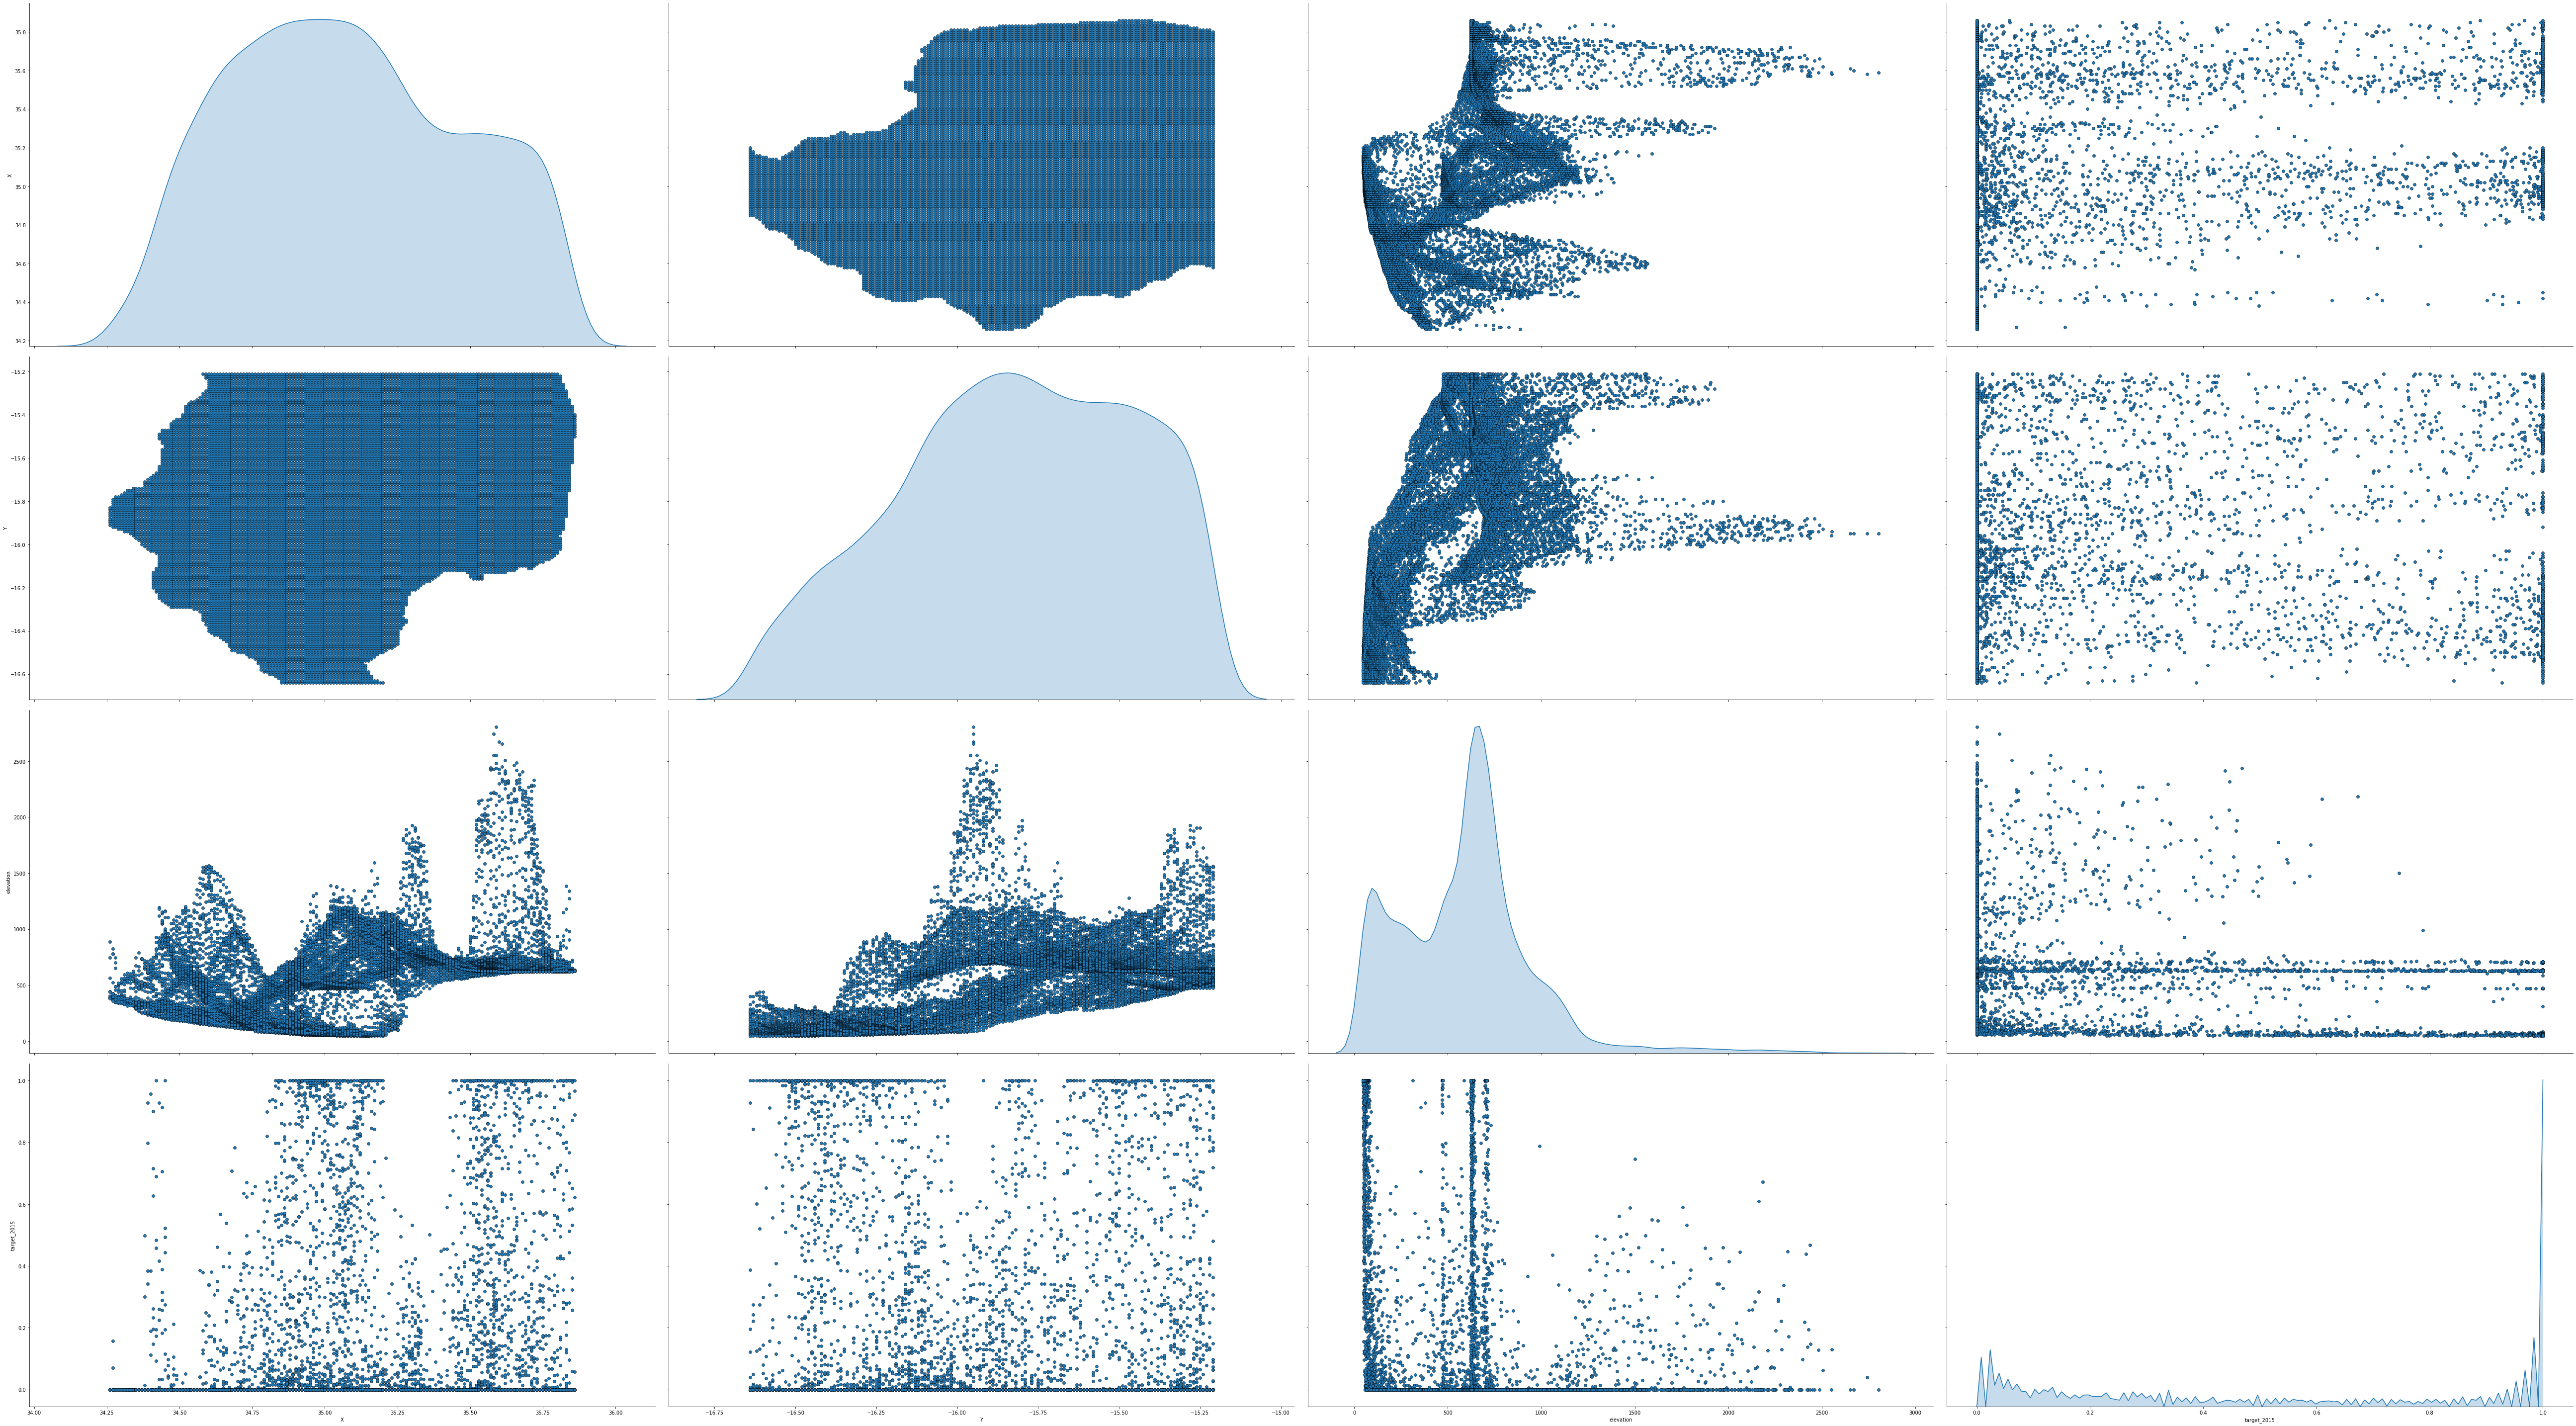

In [8]:
# Pair-wise Scatter Plots
cols = ['X', 'Y', 'elevation', 'target_2015']
pp = sns.pairplot(train[cols], height=10, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

In [9]:
# cross 'X' and 'Y'
train['XY'] = train['X']*train['Y']
train["XY_elevation"] = train['XY'] * train['elevation']
train.describe()

X       Y  target_2015  elevation  precip2014-11-16-2014-11-23  \
count 16466.0 16466.0      16466.0    16466.0                      16466.0   
mean     35.1   -15.8          0.1      592.8                          1.6   
std       0.4     0.4          0.2      354.8                          4.2   
min      34.3   -16.6          0.0       45.5                          0.0   
25%      34.8   -16.1          0.0      329.1                          0.0   
50%      35.0   -15.8          0.0      623.0                          0.0   
75%      35.4   -15.5          0.0      751.4                          1.3   
max      35.9   -15.2          1.0     2803.3                         19.4   

       precip2014-11-23-2014-11-30  precip2014-11-30-2014-12-07  \
count                      16466.0                      16466.0   
mean                           2.5                          1.2   
std                            8.6                          4.4   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                           41.0                         22.0   

       precip2014-12-07-2014-12-14  precip2014-12-14-2014-12-21  \
count                      16466.0                      16466.0   
mean                           8.3                          8.9   
std                            4.3                          3.8   
min                            1.4                          3.6   
25%                            5.5                          5.9   
50%                            7.9                          8.6   
75%                           10.9                         11.0   
max                           18.9                         23.0   

       precip2014-12-21-2014-12-28  ...  precip2019-03-31-2019-04-07  \
count                      16466.0  ...                      16466.0   
mean                           9.6  ...                          3.5   
std                            4.5  ...                          8.0   
min                            1.3  ...                          0.0   
25%                            6.2  ...                          0.0   
50%                            8.8  ...                          0.0   
75%                           12.7  ...                          2.9   
max                           21.8  ...                         37.1   

       precip2019-04-07-2019-04-14  precip2019-04-14-2019-04-21  \
count                      16466.0                      16466.0   
mean                           3.6                          9.1   
std                            3.8                          6.9   
min                            0.0                          0.0   
25%                            0.0                          4.4   
50%                            2.6                          7.9   
75%                            6.4                         13.5   
max                           13.0                         46.4   

       precip2019-04-21-2019-04-28  precip2019-04-28-2019-05-05  \
count                      16466.0                      16466.0   
mean                           1.7                          0.5   
std                            4.4                          1.5   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                           19.5                          6.9   

       precip2019-05-05-2019-05-12  precip2019-05-12-2019-05-19  \
count                      16466.0                      16466.0   
mean                           1.0                          1.6   
std                            3.7         

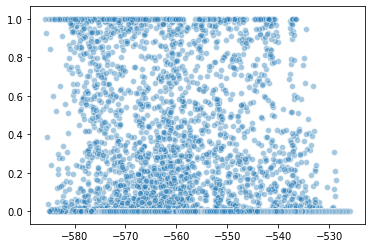

In [10]:
# Scatter Plot
plt.scatter(train['XY'], train['target_2015'], alpha=0.4, edgecolors='w')

In [11]:
train['total_precip_2015'] = 0
train['total_precip_2019'] = 0
count_2015=0
count_2019=0
for col in train.columns:
    if len(col) == 27:
        if col[9] == "5":
            count_2015 += 1
            train['total_precip_2015'] += train[col]
        elif  col[9] == "9":
            count_2019 += 1
            train['total_precip_2019'] += train[col]
        else:
            continue
    else:
        continue
train["ave_precip_2015"] = train['total_precip_2015'] / count_2015
train["ave_precip_2019"] = train['total_precip_2019'] / count_2019
train.describe()

X       Y  target_2015  elevation  precip2014-11-16-2014-11-23  \
count 16466.0 16466.0      16466.0    16466.0                      16466.0   
mean     35.1   -15.8          0.1      592.8                          1.6   
std       0.4     0.4          0.2      354.8                          4.2   
min      34.3   -16.6          0.0       45.5                          0.0   
25%      34.8   -16.1          0.0      329.1                          0.0   
50%      35.0   -15.8          0.0      623.0                          0.0   
75%      35.4   -15.5          0.0      751.4                          1.3   
max      35.9   -15.2          1.0     2803.3                         19.4   

       precip2014-11-23-2014-11-30  precip2014-11-30-2014-12-07  \
count                      16466.0                      16466.0   
mean                           2.5                          1.2   
std                            8.6                          4.4   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                           41.0                         22.0   

       precip2014-12-07-2014-12-14  precip2014-12-14-2014-12-21  \
count                      16466.0                      16466.0   
mean                           8.3                          8.9   
std                            4.3                          3.8   
min                            1.4                          3.6   
25%                            5.5                          5.9   
50%                            7.9                          8.6   
75%                           10.9                         11.0   
max                           18.9                         23.0   

       precip2014-12-21-2014-12-28  ...  precip2019-04-28-2019-05-05  \
count                      16466.0  ...                      16466.0   
mean                           9.6  ...                          0.5   
std                            4.5  ...                          1.5   
min                            1.3  ...                          0.0   
25%                            6.2  ...                          0.0   
50%                            8.8  ...                          0.0   
75%                           12.7  ...                          0.0   
max                           21.8  ...                          6.9   

       precip2019-05-05-2019-05-12  precip2019-05-12-2019-05-19  \
count                      16466.0                      16466.0   
mean                           1.0                          1.6   
std                            3.7                          4.7   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                           18.2                         20.1   

       LC_Type1_mode      XY  XY_elevation  total_precip_2015  \
count        16466.0 16466.0       16466.0            16466.0   
mean            10.7  -554.7     -327752.4              194.0   
std              2.0    12.8      197226.3               23.7   
min              2.0  -585.7    -1591324.7              148.2   
25%              9.0  -564.7     -417132.0              179.3   
50%             10.0  -554.3     -341942.2              189.0   
75%             12.0  -544.6     -181173.2              206.7   
max             17.0  -526.0      -26592.7              251.6   

       total_precip_2019  ave_precip_2015  ave_precip_2019  
count            16466.0          16466.0          16466.0  
mean               213.5             19.4             12.6  
std                 27.2              2.4              1.6  
min               

In [12]:
# Drop precip columns
# since we have computed total and average rainfall
for col in train.columns:
    if len(col) == 27:
        train = train.drop(columns=[col])
    else:
        continue
test = train.copy()

In [13]:
train.describe()

X       Y  target_2015  elevation  LC_Type1_mode      XY  \
count 16466.0 16466.0      16466.0    16466.0        16466.0 16466.0   
mean     35.1   -15.8          0.1      592.8           10.7  -554.7   
std       0.4     0.4          0.2      354.8            2.0    12.8   
min      34.3   -16.6          0.0       45.5            2.0  -585.7   
25%      34.8   -16.1          0.0      329.1            9.0  -564.7   
50%      35.0   -15.8          0.0      623.0           10.0  -554.3   
75%      35.4   -15.5          0.0      751.4           12.0  -544.6   
max      35.9   -15.2          1.0     2803.3           17.0  -526.0   

       XY_elevation  total_precip_2015  total_precip_2019  ave_precip_2015  \
count       16466.0            16466.0            16466.0          16466.0   
mean      -327752.4              194.0              213.5             19.4   
std        197226.3               23.7               27.2              2.4   
min      -1591324.7              148.2              175.4             14.8   
25%       -417132.0              179.3              199.3             17.9   
50%       -341942.2              189.0              207.6             18.9   
75%       -181173.2              206.7              220.6             20.7   
max        -26592.7              251.6              323.8             25.2   

       ave_precip_2019  
count          16466.0  
mean              12.6  
std                1.6  
min               10.3  
25%               11.7  
50%               12.2  
75%               13.0  
max               19.0

In [14]:
test.describe()

X       Y  target_2015  elevation  LC_Type1_mode      XY  \
count 16466.0 16466.0      16466.0    16466.0        16466.0 16466.0   
mean     35.1   -15.8          0.1      592.8           10.7  -554.7   
std       0.4     0.4          0.2      354.8            2.0    12.8   
min      34.3   -16.6          0.0       45.5            2.0  -585.7   
25%      34.8   -16.1          0.0      329.1            9.0  -564.7   
50%      35.0   -15.8          0.0      623.0           10.0  -554.3   
75%      35.4   -15.5          0.0      751.4           12.0  -544.6   
max      35.9   -15.2          1.0     2803.3           17.0  -526.0   

       XY_elevation  total_precip_2015  total_precip_2019  ave_precip_2015  \
count       16466.0            16466.0            16466.0          16466.0   
mean      -327752.4              194.0              213.5             19.4   
std        197226.3               23.7               27.2              2.4   
min      -1591324.7              148.2              175.4             14.8   
25%       -417132.0              179.3              199.3             17.9   
50%       -341942.2              189.0              207.6             18.9   
75%       -181173.2              206.7              220.6             20.7   
max        -26592.7              251.6              323.8             25.2   

       ave_precip_2019  
count          16466.0  
mean              12.6  
std                1.6  
min               10.3  
25%               11.7  
50%               12.2  
75%               13.0  
max               19.0

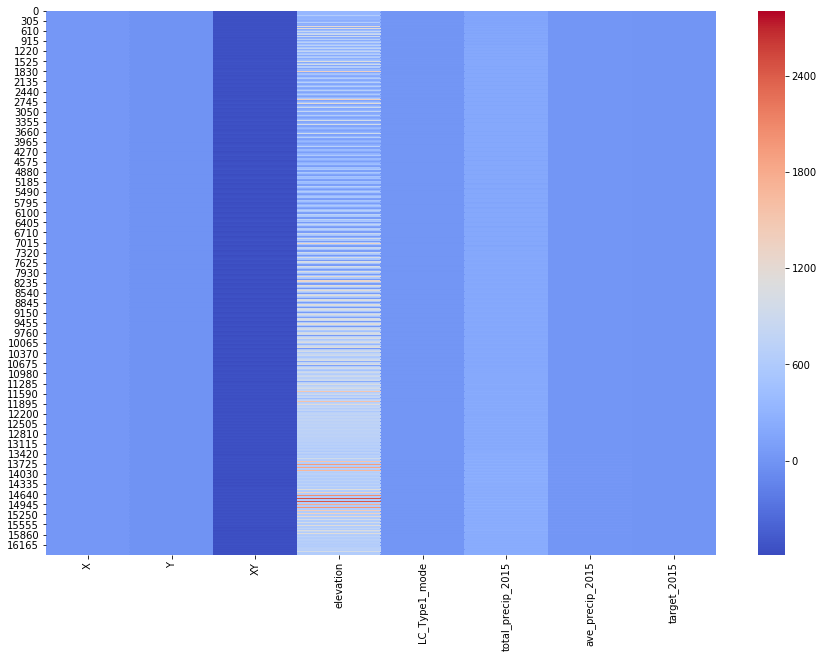

In [15]:
# Heat mat
cols = ['X', 'Y', 'XY', 'elevation', 'LC_Type1_mode', 'total_precip_2015', 'ave_precip_2015', 'target_2015']
f, ax = plt.subplots(figsize=(15,10))
corr= corr_features.corr()
heatmap = sns.heatmap(round(train[cols], 2), annot=False, ax=ax, cmap='coolwarm')

In [16]:
# # Pair-wise Scatter Plots
# pp = sns.pairplot(train[cols], height=5, aspect=1.8,
#                   plot_kws=dict(edgecolor="k", linewidth=0.5),
#                   diag_kind="kde", diag_kws=dict(shade=True))

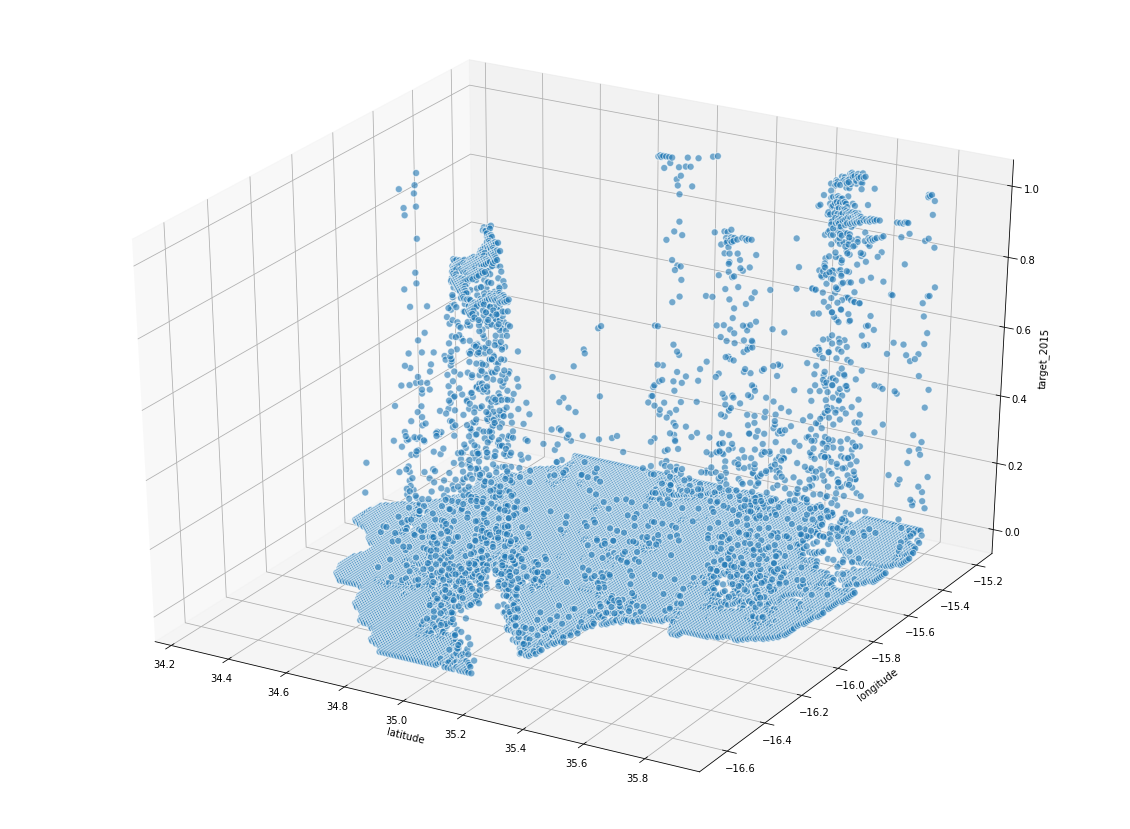

In [17]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

xs = train['X']
ys = train['Y']
zs = train['target_2015']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('target_2015')

plt.show()

Text(0.5, 1.05, 'Longitude - Latitude - Target_2015')

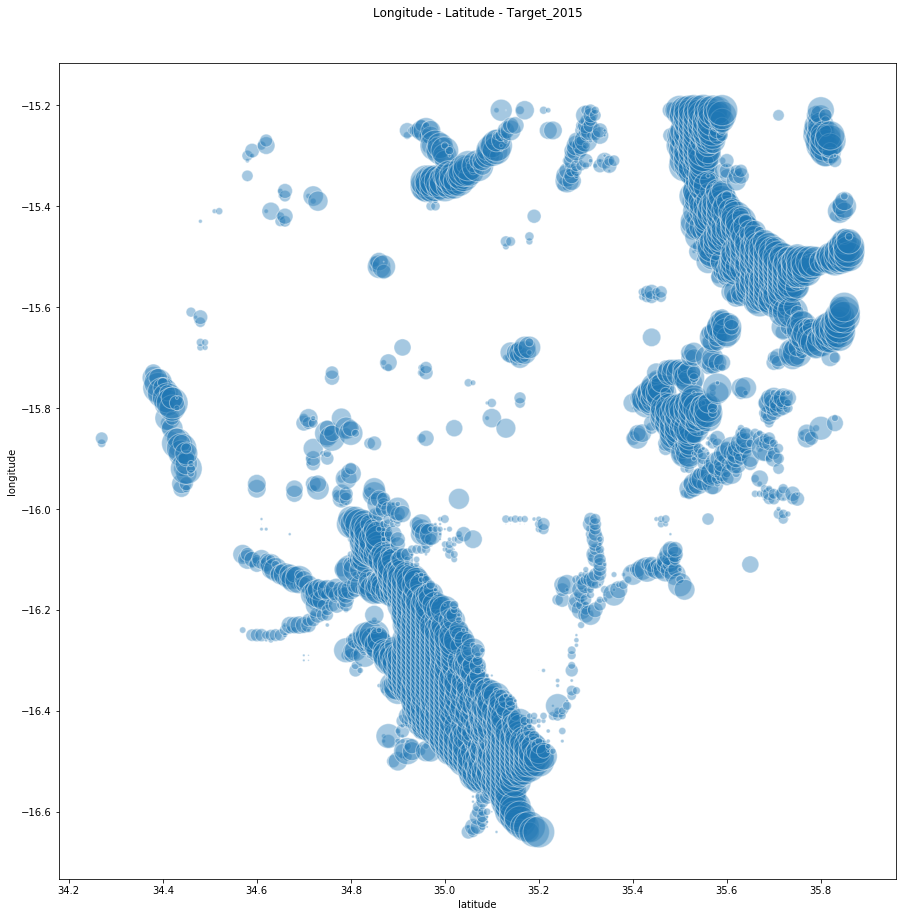

In [18]:
fig = plt.gcf()
fig.set_size_inches(15, 15)

plt.scatter(x = train['X'], 
            y = train['Y'], 
            s = train['target_2015']*1000, # <== 😀 Look here!
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Longitude - Latitude - Target_2015', y=1.05)

In [19]:
import plotly.express as px
import plotly.graph_objects as go

fig = plt.gcf()
fig.set_size_inches(50, 50)

fig = px.scatter_3d(train, x='X', y='Y', z='elevation', color='target_2015', size_max=2)
fig.update_layout(title='Elevation', autosize=True,
                      width=500, height=500,
                      margin=dict(l=65, r=50, b=65, t=90))
fig.show()

# fig = go.Figure(data=[go.Scatter3d(x=train['X'], y=train['Y'], z=train['elevation'], color=train['target_2015'],
#                                    mode='markers')])
# fig.show()

# fig = go.Figure(data=[go.Surface(x=train['X'], y=train['Y'], z=train['elevation'],  surfacecolor=train['target_2015'])])
# fig.show()

<Figure size 3600x3600 with 0 Axes>

In [20]:
test = train.copy()

# Drop precip columns from train and test
for col in train.columns:
    if len(col) == 27:
        if col[9] == "5":
            train = train.drop(columns=[col])
        elif  col[9] == "9":
            test = test.drop(columns=[col])
        else:
            continue
    else:
        continue

In [21]:
train.head()

X     Y  target_2015  elevation  LC_Type1_mode  \
0 34.3 -15.9          0.0      887.8              9   
1 34.3 -15.9          0.0      743.4              9   
2 34.3 -15.9          0.0      565.7              9   
3 34.3 -15.9          0.0      443.4             10   
4 34.3 -15.9          0.0      437.4             10   

                              Square_ID     XY  XY_elevation  \
0  4e3c3896-14ce-11ea-bce5-f49634744a41 -545.1     -483899.5   
1  4e3c3897-14ce-11ea-bce5-f49634744a41 -544.7     -404957.4   
2  4e3c3898-14ce-11ea-bce5-f49634744a41 -544.4     -307977.6   
3  4e3c3899-14ce-11ea-bce5-f49634744a41 -544.0     -241227.3   
4  4e3c389a-14ce-11ea-bce5-f49634744a41 -543.7     -237840.7   

   total_precip_2015  total_precip_2019  ave_precip_2015  ave_precip_2019  
0              153.5              182.2             15.3             10.7  
1              153.5              182.2             15.3             10.7  
2              153.5              182.2             15.3             10.7  
3              153.5              182.2             15.3             10.7  
4              153.5              182.2             15.3             10.7

In [22]:
train_unpivoted = train.melt(id_vars=['Square_ID'], value_vars=['total_precip_2015', 'total_precip_2019'], var_name='year', value_name='total_precip')
train_unpivoted

Square_ID               year  total_precip
0      4e3c3896-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5
1      4e3c3897-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5
2      4e3c3898-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5
3      4e3c3899-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5
4      4e3c389a-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5
...                                     ...                ...           ...
32927  4e6f5dfd-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1
32928  4e6f5dfe-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1
32929  4e6f5dff-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1
32930  4e6f5e00-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1
32931  4e6f5e01-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1

[32932 rows x 3 columns]

In [23]:
train_df = train_unpivoted.iloc[:16466]
test_df = train_unpivoted.iloc[16466:]
train_df = train_df.set_index('Square_ID').join(train.set_index('Square_ID')).reset_index()
train_df

Square_ID               year  total_precip  \
0      4e3c3896-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
1      4e3c3897-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
2      4e3c3898-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
3      4e3c3899-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
4      4e3c389a-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
...                                     ...                ...           ...   
16461  4e6f5dfd-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16462  4e6f5dfe-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16463  4e6f5dff-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16464  4e6f5e00-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16465  4e6f5e01-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   

         X     Y  target_2015  elevation  LC_Type1_mode     XY  XY_elevation  \
0     34.3 -15.9          0.0      887.8              9 -545.1     -483899.5   
1     34.3 -15.9          0.0      743.4              9 -544.7     -404957.4   
2     34.3 -15.9          0.0      565.7              9 -544.4     -307977.6   
3     34.3 -15.9          0.0      443.4             10 -544.0     -241227.3   
4     34.3 -15.9          0.0      437.4             10 -543.7     -237840.7   
...    ...   ...          ...        ...            ...    ...           ...   
16461 35.9 -15.4          0.0      635.7             10 -553.7     -351959.5   
16462 35.9 -15.4          0.0      632.6             10 -553.3     -350029.5   
16463 35.9 -15.4          0.0      632.5             10 -553.0     -349720.4   
16464 35.9 -15.4          0.0      629.3             10 -552.6     -347737.7   
16465 35.9 -15.4          0.0      626.2             10 -552.2     -345795.7   

       total_precip_2015  total_precip_2019  ave_precip_2015  ave_precip_2019  
0                  153.5              182.2             15.3             10.7  
1                  153.5              182.2             15.3             10.7  
2                  153.5              182.2             15.3             10.7  
3                  153.5              182.2             15.3             10.7  
4                  153.5              182.2             15.3             10.7  
...                  ...                ...              ...              ...  
16461              228.5              277.1             22.9             16.3  
16462              228.5              277.1             22.9             16.3  
16463              228.5              277.1             22.9             16.3  
16464              228.5              277.1             22.9             16.3  
16465              228.5              277.1             22.9             16.3  

[16466 rows x 14 columns]

In [24]:
test_df = test_df.set_index('Square_ID').join(train.set_index('Square_ID')).reset_index()
test_df

Square_ID               year  total_precip  \
0      4e3c3896-14ce-11ea-bce5-f49634744a41  total_precip_2019         182.2   
1      4e3c3897-14ce-11ea-bce5-f49634744a41  total_precip_2019         182.2   
2      4e3c3898-14ce-11ea-bce5-f49634744a41  total_precip_2019         182.2   
3      4e3c3899-14ce-11ea-bce5-f49634744a41  total_precip_2019         182.2   
4      4e3c389a-14ce-11ea-bce5-f49634744a41  total_precip_2019         182.2   
...                                     ...                ...           ...   
16461  4e6f5dfd-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1   
16462  4e6f5dfe-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1   
16463  4e6f5dff-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1   
16464  4e6f5e00-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1   
16465  4e6f5e01-14ce-11ea-bce5-f49634744a41  total_precip_2019         277.1   

         X     Y  target_2015  elevation  LC_Type1_mode     XY  XY_elevation  \
0     34.3 -15.9          0.0      887.8              9 -545.1     -483899.5   
1     34.3 -15.9          0.0      743.4              9 -544.7     -404957.4   
2     34.3 -15.9          0.0      565.7              9 -544.4     -307977.6   
3     34.3 -15.9          0.0      443.4             10 -544.0     -241227.3   
4     34.3 -15.9          0.0      437.4             10 -543.7     -237840.7   
...    ...   ...          ...        ...            ...    ...           ...   
16461 35.9 -15.4          0.0      635.7             10 -553.7     -351959.5   
16462 35.9 -15.4          0.0      632.6             10 -553.3     -350029.5   
16463 35.9 -15.4          0.0      632.5             10 -553.0     -349720.4   
16464 35.9 -15.4          0.0      629.3             10 -552.6     -347737.7   
16465 35.9 -15.4          0.0      626.2             10 -552.2     -345795.7   

       total_precip_2015  total_precip_2019  ave_precip_2015  ave_precip_2019  
0                  153.5              182.2             15.3             10.7  
1                  153.5              182.2             15.3             10.7  
2                  153.5              182.2             15.3             10.7  
3                  153.5              182.2             15.3             10.7  
4                  153.5              182.2             15.3             10.7  
...                  ...                ...              ...              ...  
16461              228.5              277.1             22.9             16.3  
16462              228.5              277.1             22.9             16.3  
16463              228.5              277.1             22.9             16.3  
16464              228.5              277.1             22.9             16.3  
16465              228.5              277.1             22.9             16.3  

[16466 rows x 14 columns]

In [25]:
train = train_df.copy()
test_df = test_df.drop(columns=['target_2015'])
train.describe()

total_precip       X       Y  target_2015  elevation  LC_Type1_mode  \
count       16466.0 16466.0 16466.0      16466.0    16466.0        16466.0   
mean          194.0    35.1   -15.8          0.1      592.8           10.7   
std            23.7     0.4     0.4          0.2      354.8            2.0   
min           148.2    34.3   -16.6          0.0       45.5            2.0   
25%           179.3    34.8   -16.1          0.0      329.1            9.0   
50%           189.0    35.0   -15.8          0.0      623.0           10.0   
75%           206.7    35.4   -15.5          0.0      751.4           12.0   
max           251.6    35.9   -15.2          1.0     2803.3           17.0   

           XY  XY_elevation  total_precip_2015  total_precip_2019  \
count 16466.0       16466.0            16466.0            16466.0   
mean   -554.7     -327752.4              194.0              213.5   
std      12.8      197226.3               23.7               27.2   
min    -585.7    -1591324.7              148.2              175.4   
25%    -564.7     -417132.0              179.3              199.3   
50%    -554.3     -341942.2              189.0              207.6   
75%    -544.6     -181173.2              206.7              220.6   
max    -526.0      -26592.7              251.6              323.8   

       ave_precip_2015  ave_precip_2019  
count          16466.0          16466.0  
mean              19.4             12.6  
std                2.4              1.6  
min               14.8             10.3  
25%               17.9             11.7  
50%               18.9             12.2  
75%               20.7             13.0  
max               25.2             19.0

In [26]:
# ## Create columns for rise and run in all 4 directions
# ## Cacluate slope
# '''
# Probably requires reordering the data set according to X and Y
# Or maybe for/if statement for when diff of Y is greater than zero then
# '''

# train['elevation_diff'] = train[elevation].diff()
# train['elevation_diff'] = train[elevation].diff()


# train['X1_diff'] = train[X].diff()
# train['X2_diff'] = train[X].diff(periods=-1)
# train['Y1_diff'] = train[Y].diff()
# train['Y2_diff'] = train[Y].diff(periods=-1)

In [155]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

label_train = train.copy()

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(label_train[['LC_Type1_mode']]))

# One-hot encoding removed index; put it back
OH_cols_train.index = label_train.index

# Add one-hot encoded columns to numerical features
label_train = pd.concat([label_train, OH_cols_train], axis=1)
label_train.describe()

total_precip       X       Y  target_2015  elevation  LC_Type1_mode  \
count       16466.0 16466.0 16466.0      16466.0    16466.0        16466.0   
mean          194.0    35.1   -15.8          0.1      592.8            6.7   
std            23.7     0.4     0.4          0.2      354.8            1.7   
min           148.2    34.3   -16.6          0.0       45.5            0.0   
25%           179.3    34.8   -16.1          0.0      329.1            5.0   
50%           189.0    35.0   -15.8          0.0      623.0            6.0   
75%           206.7    35.4   -15.5          0.0      751.4            8.0   
max           251.6    35.9   -15.2          1.0     2803.3           11.0   

           XY  XY_elevation  total_precip_2015  total_precip_2019  ...  \
count 16466.0       16466.0            16466.0            16466.0  ...   
mean   -554.7     -327752.4              194.0              213.5  ...   
std      12.8      197226.3               23.7               27.2  ...   
min    -585.7    -1591324.7              148.2              175.4  ...   
25%    -564.7     -417132.0              179.3              199.3  ...   
50%    -554.3     -341942.2              189.0              207.6  ...   
75%    -544.6     -181173.2              206.7              220.6  ...   
max    -526.0      -26592.7              251.6              323.8  ...   

            2       3       4       5       6       7       8       9      10  \
count 16466.0 16466.0 16466.0 16466.0 16466.0 16466.0 16466.0 16466.0 16466.0   
mean      0.0     0.0     0.0     0.2     0.3     0.0     0.4     0.0     0.0   
std       0.1     0.0     0.0     0.4     0.5     0.1     0.5     0.1     0.2   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0     0.0   
max       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

           11  
count 16466.0  
mean      0.0  
std       0.2  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       1.0  

[8 rows x 25 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

In [27]:
# train
train_df.describe()

total_precip       X       Y  target_2015  elevation  LC_Type1_mode  \
count       16466.0 16466.0 16466.0      16466.0    16466.0        16466.0   
mean          194.0    35.1   -15.8          0.1      592.8           10.7   
std            23.7     0.4     0.4          0.2      354.8            2.0   
min           148.2    34.3   -16.6          0.0       45.5            2.0   
25%           179.3    34.8   -16.1          0.0      329.1            9.0   
50%           189.0    35.0   -15.8          0.0      623.0           10.0   
75%           206.7    35.4   -15.5          0.0      751.4           12.0   
max           251.6    35.9   -15.2          1.0     2803.3           17.0   

           XY  XY_elevation  total_precip_2015  total_precip_2019  \
count 16466.0       16466.0            16466.0            16466.0   
mean   -554.7     -327752.4              194.0              213.5   
std      12.8      197226.3               23.7               27.2   
min    -585.7    -1591324.7              148.2              175.4   
25%    -564.7     -417132.0              179.3              199.3   
50%    -554.3     -341942.2              189.0              207.6   
75%    -544.6     -181173.2              206.7              220.6   
max    -526.0      -26592.7              251.6              323.8   

       ave_precip_2015  ave_precip_2019  
count          16466.0          16466.0  
mean              19.4             12.6  
std                2.4              1.6  
min               14.8             10.3  
25%               17.9             11.7  
50%               18.9             12.2  
75%               20.7             13.0  
max               25.2             19.0

In [28]:
train.describe()

total_precip       X       Y  target_2015  elevation  LC_Type1_mode  \
count       16466.0 16466.0 16466.0      16466.0    16466.0        16466.0   
mean          194.0    35.1   -15.8          0.1      592.8           10.7   
std            23.7     0.4     0.4          0.2      354.8            2.0   
min           148.2    34.3   -16.6          0.0       45.5            2.0   
25%           179.3    34.8   -16.1          0.0      329.1            9.0   
50%           189.0    35.0   -15.8          0.0      623.0           10.0   
75%           206.7    35.4   -15.5          0.0      751.4           12.0   
max           251.6    35.9   -15.2          1.0     2803.3           17.0   

           XY  XY_elevation  total_precip_2015  total_precip_2019  \
count 16466.0       16466.0            16466.0            16466.0   
mean   -554.7     -327752.4              194.0              213.5   
std      12.8      197226.3               23.7               27.2   
min    -585.7    -1591324.7              148.2              175.4   
25%    -564.7     -417132.0              179.3              199.3   
50%    -554.3     -341942.2              189.0              207.6   
75%    -544.6     -181173.2              206.7              220.6   
max    -526.0      -26592.7              251.6              323.8   

       ave_precip_2015  ave_precip_2019  
count          16466.0          16466.0  
mean              19.4             12.6  
std                2.4              1.6  
min               14.8             10.3  
25%               17.9             11.7  
50%               18.9             12.2  
75%               20.7             13.0  
max               25.2             19.0

In [29]:
test_df.describe()

total_precip       X       Y  elevation  LC_Type1_mode      XY  \
count       16466.0 16466.0 16466.0    16466.0        16466.0 16466.0   
mean          213.5    35.1   -15.8      592.8           10.7  -554.7   
std            27.2     0.4     0.4      354.8            2.0    12.8   
min           175.4    34.3   -16.6       45.5            2.0  -585.7   
25%           199.3    34.8   -16.1      329.1            9.0  -564.7   
50%           207.6    35.0   -15.8      623.0           10.0  -554.3   
75%           220.6    35.4   -15.5      751.4           12.0  -544.6   
max           323.8    35.9   -15.2     2803.3           17.0  -526.0   

       XY_elevation  total_precip_2015  total_precip_2019  ave_precip_2015  \
count       16466.0            16466.0            16466.0          16466.0   
mean      -327752.4              194.0              213.5             19.4   
std        197226.3               23.7               27.2              2.4   
min      -1591324.7              148.2              175.4             14.8   
25%       -417132.0              179.3              199.3             17.9   
50%       -341942.2              189.0              207.6             18.9   
75%       -181173.2              206.7              220.6             20.7   
max        -26592.7              251.6              323.8             25.2   

       ave_precip_2019  
count          16466.0  
mean              12.6  
std                1.6  
min               10.3  
25%               11.7  
50%               12.2  
75%               13.0  
max               19.0

In [30]:
# # Pair-wise Scatter Plots
# cols = ['X', 'Y', 'elevation', 'XY', 'XY_elevation', 'LC_Type1_mode', 'total_precip', 'target_2015']
# pp = sns.pairplot(train_df[cols], height=10, aspect=1.8,
#                   plot_kws=dict(edgecolor="k", linewidth=0.5),
#                   diag_kind="kde", diag_kws=dict(shade=True))

In [31]:
def normalize_feature(*args):
    for arg in args:
        feature_name = 'norm_'+arg
        train_df[feature_name] = (train_df[arg].copy() - train_df[arg].mean())/train_df[arg].std()
        test_df[feature_name] = (test_df[arg].copy() - test_df[arg].mean())/test_df[arg].std()
        validate_df[feature_name] = (validate_df[arg].copy() - validate_df[arg].mean())/validate_df[arg].std()

In [32]:
## Alternative if normal validate fails

def create_validation_split(train, validation_split):
    "Split train_data"
    "Validation_split is the size of the validation set"
    train_set_size = int((round(len(train.index))*(1-validation_split)))
    validate_set_size = int((round(len(train.index))*validation_split))
    train_validate_size = train_set_size + validate_set_size
    print(train_set_size)
    print(validate_set_size)
    print(train_validate_size)
    train.iloc[np.random.permutation(len(train))].reset_index(drop=True)
    train_df = train.iloc[:int(round(len(train.index))*(1-validation_split))]
    # Validate is wrong as it takes out of the train which has already been sampled
    validate_df = train.iloc[int(round(len(train.index))*validation_split):]
    return train_df, validate_df

In [44]:
'''
PLEASE ONLY RUN THIS ONCE PER TRAINING
It calls the create validation split which will resplit the data if run multiple times
'''
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

validation_split = 0.5

# Create validation_split
train_df, validate_df = create_validation_split(train, validation_split)
print(train_df)

# Invoke the normalize feature method
normalize_feature("elevation", "XY", "XY_elevation", "total_precip", "LC_Type1_mode")

# Create a numerical feature column to represent feature 1.
feature_1 = tf.feature_column.numeric_column("norm_elevation")
feature_columns.append(feature_1)

# Create a numerical feature column to represent feature 2.
feature_2 = tf.feature_column.numeric_column("norm_XY")
feature_columns.append(feature_2)

# Create a numerical feature column to represent longitude.
feature_3 = tf.feature_column.numeric_column("norm_XY_elevation")
feature_columns.append(feature_3)

# Create a numerical feature column to represent longitude.
feature_4 = tf.feature_column.numeric_column("norm_total_precip")
feature_columns.append(feature_4)

# Create a numerical feature column to represent longitude.
feature_5 = tf.feature_column.numeric_column("norm_LC_Type1_mode")
feature_columns.append(feature_5)

print(feature_columns)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:
feature_layer(dict(train_df))

8233
8233
16466
                                 Square_ID               year  total_precip  \
0     4e3c3896-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
1     4e3c3897-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
2     4e3c3898-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
3     4e3c3899-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
4     4e3c389a-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
...                                    ...                ...           ...   
8228  4e684ad8-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8229  4e684ad9-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8230  4e684ada-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8231  4e684adb-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8232  4e684adc-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   

        X     Y  target_2015  eleva

C:\Users\TNAGABA002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\TNAGABA002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[NumericColumn(key='norm_elevation', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='norm_XY', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='norm_XY_elevation', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='norm_total_precip', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='norm_LC_Type1_mode', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


<tf.Tensor: shape=(8233, 5), dtype=float32, numpy=
array([[-0.7408739 ,  0.5091476 , -1.6140895 ,  1.5945362 , -1.9852089 ],
       [-0.7408739 ,  0.534619  , -1.108735  ,  1.0976117 , -1.9852089 ],
       [-0.7408739 ,  0.5600903 , -0.48791102,  0.48600754, -1.9852089 ],
       ...,
       [ 1.4646033 ,  0.512798  , -0.8350113 ,  0.8261805 ,  0.5927518 ],
       [ 1.4646033 ,  0.53885674, -0.820711  ,  0.813535  ,  0.5927518 ],
       [ 1.4646033 ,  0.5649155 , -0.8950656 ,  0.88845176,  0.5927518 ]],
      dtype=float32)>

In [34]:
# train_set
train_df

Square_ID               year  total_precip  \
0     4e3c3896-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
1     4e3c3897-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
2     4e3c3898-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
3     4e3c3899-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
4     4e3c389a-14ce-11ea-bce5-f49634744a41  total_precip_2015         153.5   
...                                    ...                ...           ...   
8228  4e684ad8-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8229  4e684ad9-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8230  4e684ada-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8231  4e684adb-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8232  4e684adc-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   

        X     Y  target_2015  elevation  LC_Type1_mode     XY  XY_elevation  \
0    34.3 -15.9          0.0      887.8              9 -545.1     -483899.5   
1    34.3 -15.9          0.0      743.4              9 -544.7     -404957.4   
2    34.3 -15.9          0.0      565.7              9 -544.4     -307977.6   
3    34.3 -15.9          0.0      443.4             10 -544.0     -241227.3   
4    34.3 -15.9          0.0      437.4             10 -543.7     -237840.7   
...   ...   ...          ...        ...            ...    ...           ...   
8228 35.0 -15.6          0.0      667.6             10 -545.7     -364302.7   
8229 35.0 -15.6          0.0      650.8             10 -545.4     -354915.8   
8230 35.0 -15.6          0.0      664.6             12 -545.0     -362198.6   
8231 35.0 -15.5          0.0      660.9             12 -544.7     -359964.8   
8232 35.0 -15.5          0.0      682.6             12 -544.3     -371579.8   

      total_precip_2015  total_precip_2019  ave_precip_2015  ave_precip_2019  \
0                 153.5              182.2             15.3             10.7   
1                 153.5              182.2             15.3             10.7   
2                 153.5              182.2             15.3             10.7   
3                 153.5              182.2             15.3             10.7   
4                 153.5              182.2             15.3             10.7   
...                 ...                ...              ...              ...   
8228              186.9              214.1             18.7             12.6   
8229              186.9              214.1             18.7             12.6   
8230              186.9              214.1             18.7             12.6   
8231              186.9              214.1             18.7             12.6   
8232              186.9              214.1             18.7             12.6   

      norm_elevation  norm_XY  norm_XY_elevation  norm_total_precip  \
0                1.6      0.5               -1.6               -2.0   
1                1.1      0.5               -1.1               -2.0   
2                0.5      0.6               -0.5               -2.0   
3                0.1      0.6               -0.1               -2.0   
4                0.0      0.6               -0.0               -2.0   
...              ...      ...                ...                ...   
8228             0.8      0.5               -0.8                0.6   
8229             0.8      0.5               -0.8                0.6   
8230             0.8      0.5               -0.8                0.6   
8231             0.8      0.5               -0.8                0.6   
8232             0.9      0.6               -0.9                0.6   

      norm_LC_Type1_mode  
0                   -0.7  
1                   -0.7  
2                   -0.7  
3                   -0.0  
4                   -0.0  
...                  ...  
8228                -0.0  
8229                -0.0  
8230                 1.5  
8231                 1.5  
8232                 1.5

In [35]:
# validate_set
validate_df

Square_ID               year  total_precip  \
8233   4e684add-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8234   4e684ade-14ce-11ea-bce5-f49634744a41  total_precip_2015         186.9   
8235   4e684adf-14ce-11ea-bce5-f49634744a41  total_precip_2015         188.1   
8236   4e684ae0-14ce-11ea-bce5-f49634744a41  total_precip_2015         199.9   
8237   4e684ae1-14ce-11ea-bce5-f49634744a41  total_precip_2015         199.9   
...                                     ...                ...           ...   
16461  4e6f5dfd-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16462  4e6f5dfe-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16463  4e6f5dff-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16464  4e6f5e00-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   
16465  4e6f5e01-14ce-11ea-bce5-f49634744a41  total_precip_2015         228.5   

         X     Y  target_2015  elevation  LC_Type1_mode     XY  XY_elevation  \
8233  35.0 -15.5          0.0      621.6             12 -544.0     -338149.3   
8234  35.0 -15.5          0.0      602.3             12 -543.6     -327430.8   
8235  35.0 -15.5          0.0      574.0             12 -543.3     -311841.8   
8236  35.0 -15.5          0.0      561.5             12 -542.9     -304856.9   
8237  35.0 -15.5          0.0      551.1             12 -542.6     -299029.6   
...    ...   ...          ...        ...            ...    ...           ...   
16461 35.9 -15.4          0.0      635.7             10 -553.7     -351959.5   
16462 35.9 -15.4          0.0      632.6             10 -553.3     -350029.5   
16463 35.9 -15.4          0.0      632.5             10 -553.0     -349720.4   
16464 35.9 -15.4          0.0      629.3             10 -552.6     -347737.7   
16465 35.9 -15.4          0.0      626.2             10 -552.2     -345795.7   

       total_precip_2015  total_precip_2019  ave_precip_2015  ave_precip_2019  \
8233               186.9              214.1             18.7             12.6   
8234               186.9              214.1             18.7             12.6   
8235               188.1              212.3             18.8             12.5   
8236               199.9              194.9             20.0             11.5   
8237               199.9              194.9             20.0             11.5   
...                  ...                ...              ...              ...   
16461              228.5              277.1             22.9             16.3   
16462              228.5              277.1             22.9             16.3   
16463              228.5              277.1             22.9             16.3   
16464              228.5              277.1             22.9             16.3   
16465              228.5              277.1             22.9             16.3   

       norm_elevation  norm_XY  norm_XY_elevation  norm_total_precip  \
8233             -0.4      1.2                0.5               -1.0   
8234             -0.5      1.2                0.5               -1.0   
8235             -0.6      1.2                0.6               -0.9   
8236             -0.6      1.3                0.6               -0.4   
8237             -0.6      1.3                0.7               -0.4   
...               ...      ...                ...                ...   
16461            -0.4      0.3                0.4                0.9   
16462            -0.4      0.4                0.4                0.9   
16463            -0.4      0.4                0.4                0.9   
16464            -0.4      0.4                0.4                0.9   
16465            -0.4      0.5                0.4                0.9   

       norm_LC_Type1_mode  
8233                  0.2  
8234                  0.2  
8235                  0.2  
8236                  0.2  
8237                  0.2  
...                   ...  
16461                -0.6  
16462                -0.6  
16463                -

In [113]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)
    
  # Describe the topography of the model by call tf.keras.layers.Dense for each layer
  # The topography of a simple linear regression model is a single node in a single layer.
  # See the arguments below:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.
  model.add(tf.keras.layers.Dense(units=5, 
                                  input_shape=(1,),
#                                   activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01), 
                                  name='Hidden1'))
    
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=5, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01), 
                                  name='Hidden2'))
  
  # Define the third hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=5,
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l1(l=0.01), 
                                  name='Hidden2'))

#   # Define the third hidden layer with 12 nodes. 
#   model.add(tf.keras.layers.Dense(units=20,
# #                                   activation='relu',
# #                                   kernel_regularizer=tf.keras.regularizers.l1(l=0.01), 
#                                   name='Hidden2'))

#   # Define the third hidden layer with 12 nodes. 
#   model.add(tf.keras.layers.Dense(units=20,
# #                                   activation='relu',
# #                                   kernel_regularizer=tf.keras.regularizers.l1(l=0.01), 
#                                   name='Hidden2'))

  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output')) 

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, dataset, label_name, epochs, batch_size, shuffle=True, my_validation_split=0.2):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)

#   history = model.fit(x=features, y=label, batch_size=batch_size,
#                       epochs=epochs, shuffle=shuffle,
#                       validation_split=my_validation_split)

  # Gather the trained model's weight and bias.
  print(model.get_weights())
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [37]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = -2.5
  y0 = trained_bias
  x1 = 2.5
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()
    

# Needs to be updated to plot the line of best fit
#@title Define the plotting functions
def plot_the_model_plotly(trained_weight_1, trained_weight_2, trained_bias, feature_1, feature_2, label):
  """Plot the trained model against 200 random training examples."""

#   # Label the axes.
#   plt.xlabel(feature_1)
#   plt.xlabel(feature_2)
#   plt.ylabel(label)


  # Create a surface plot representing the model
  x, y = np.linspace(0, -10, 20).reshape(4, 5), np.linspace(0, -10, 20).reshape(4, 5)
  z = trained_bias + (trained_weight_1 * x) + (trained_weight_2 * y)
  fig = go.Figure(data=[go.Surface(z=z), go.Scatter3d(x=train_df[feature_1], y=train_df[feature_2], z=train_df[label],
                                   mode='markers')])
  fig.update_layout(title='Fit and scatter', autosize=True,
                      width=500, height=500,
                      margin=dict(l=65, r=50, b=65, t=90))

#   # Create a scatter plot from 200 random points of the dataset.
#   random_examples = train_df.sample(n=200)
#   fig1 = px.scatter_3d(random_examples, x=feature_1, y=feature_2, z=label, size_max=18)
    
#   # Create a red line representing the model. The red line starts
#   # at coordinates (x0, y0) and ends at coordinates (x1, y1).
#   x0 = -16.8
#   y0 = trained_bias
#   x1 = -15.2
#   x2 = 35.5
#   y1 = trained_bias + (trained_weight_1 * x1) + (trained_weight_2 * x2)
#   plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  fig.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.95, rmse.max()*1.03])
#   plt.ylim(0, 0.5)
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [114]:
import tensorflow as tf

# The following variables are the hyperparameters.
learning_rate = 0.001 # originally 0.01
epochs = 3
batch_size = 20
# validation_split = 0.5


# Specify the feature and the label.
# my_feature = "feature_norm"  # the total number of rooms on a specific city block.

my_label="target_2015" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
# weight, bias, epochs, rmse = train_model(my_model, train, 
#                                          my_feature, my_label,
#                                          epochs, batch_size)
weight, bias, epochs, rmse = train_model(my_model, train_df, my_label,
                                         epochs, batch_size)

# weight, bias, epochs, rmse = train_model(my_model, train, my_label,
#                                          epochs, batch_size, validation_split)


# print("\nThe w1 learned weight for your model is %.4f" % weight[0][0])
# print("\nThe w2 learned weight for your model is %.4f" % weight[1][1])
print("\nAll weights for your model are: "+ str(weight))
# print("The learned bias for your model is %.4f\n" % bias )

# plot_the_model_plot(weight, bias, my_feature, my_label)
# plot_the_model_plotly(weight[0], weight[1], bias, "norm_elevation", "norm_XY", my_label)
# plot_the_loss_curve(epochs, rmse)

Train on 8233 samples
Epoch 1/3
8233/8233 [==============================] - 1s 105us/sample - loss: 0.2059 - root_mean_squared_error: 0.2249
Epoch 2/3
8233/8233 [==============================] - 0s 59us/sample - loss: 0.1120 - root_mean_squared_error: 0.1874
Epoch 3/3
8233/8233 [==============================] - 0s 56us/sample - loss: 0.0769 - root_mean_squared_error: 0.1851
[array([[-0.17499602, -0.2019193 , -0.28808528,  0.20332967,  0.09520777],
       [ 0.02539032, -0.19966736,  0.26459298, -0.02632922, -0.10962448],
       [ 0.02973414, -0.12390594, -0.14980449,  0.0502339 ,  0.20610133],
       [-0.05556628,  0.22166789,  0.1786758 , -0.04371479, -0.09120866],
       [ 0.00639107,  0.08986625,  0.02083473,  0.03761036,  0.11446672]],
      dtype=float32), array([-0.07089401,  0.10134551, -0.10794984,  0.00965899,  0.07797237],
      dtype=float32), array([[ 0.05752434,  0.00111458, -0.01653737, -0.00081888,  0.02222228],
       [-0.0705073 , -0.00913338,  0.11290295, -0.2739343

In [47]:
def predict_target_2015(my_label):
  """Predict the extent of flooding based on features in the validation set."""

#   batch = validate[feature].sample(n=200, random_state=1)
#   predicted_values = my_model.predict_on_batch(x=batch)

#   # Invoke the normalize feature method
#   normalize_feature("elevation", "XY", "XY_elevation", "total_precip", "LC_Type1_mode")
#   print(validate.columns)

  features = {name:np.array(value) for name, value in validate_df.items()}
  label = np.array(features.pop(my_label))

  my_model.evaluate(x = features, y = label, batch_size=batch_size)

#   print("feature   label          predicted          variance")
#   print("  value   value          value              value")
#   print("--------------------------------------")
#   for i in range(n):
#     print ("%5.0f %6.0f %15.0f %15.0f " % (validate[feature][i],
#                                    validate[label][i],
#                                    predicted_values[i][0],
#                                    train[label][i]-predicted_values[i][0]))
    
 
# Needs to be reworked
def predict_target_2019(label):
  """Predict the extent of flooding based on a feature."""

#   # Invoke the normalize feature method
#   normalize_feature("elevation", "XY", "XY_elevation", "total_precip", "LC_Type1_mode")

  # Test using the test set
  print("\n: Evaluate the new model against the test set:")
  test_features = {name:np.array(value) for name, value in test_df.items()}

  batch = test_features
  predicted_values = my_model.predict_on_batch(x=batch)

#   print("feature   label")
#   print("  value   value")
#   print("--------------------------------------")
#   for i in range(n):
#     print ("%5.0f %6.0f" % (test['Suquare_ID'][i],
#                                    predicted_values[i][0]))
  np.savetxt("submission_linear_regression_multi_feature.csv", predicted_values, delimiter=",")

In [115]:
#Invoke the target prediction on validate set:
predict_target_2015(my_label)

8233/8233 [==============================] - 0s 51us/sample - loss: 0.0896 - root_mean_squared_error: 0.2412


In [74]:
#Invoke the target prediction on test set:
predict_target_2019(my_label)


: Evaluate the new model against the test set:
